In [40]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
data = pd.read_csv('Data/Preprocessed/no_duplicate_no_useless_feature.csv')

# Handling missing values
missing_y_values = data[data['sqft'].isnull()]
data = data.dropna(subset=['sqft'])

# Splitting the data into features (X) and target variable (y)
X = data.drop(['sqft', 'price_per_sqft', 'street', 'style' , 'city' , 'zip_code', 'days_on_mls', 'year', 'month', 'year'], axis=1)  # Replace 'output_column_name' with your target column
y = data['sqft']  # Replace 'output_column_name' with your target column
print(f"The shape of training set is:{X.shape}")
print(f"The shape of test set is:{y.shape}")
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


The shape of training set is:(10867, 6)
The shape of test set is:(10867,)


In [45]:
# Initialize the XGBRegressor
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.0001,
                max_depth = 6, alpha = 10, n_estimators = 100)

# Train the model
xg_reg.fit(X_train_scaled, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

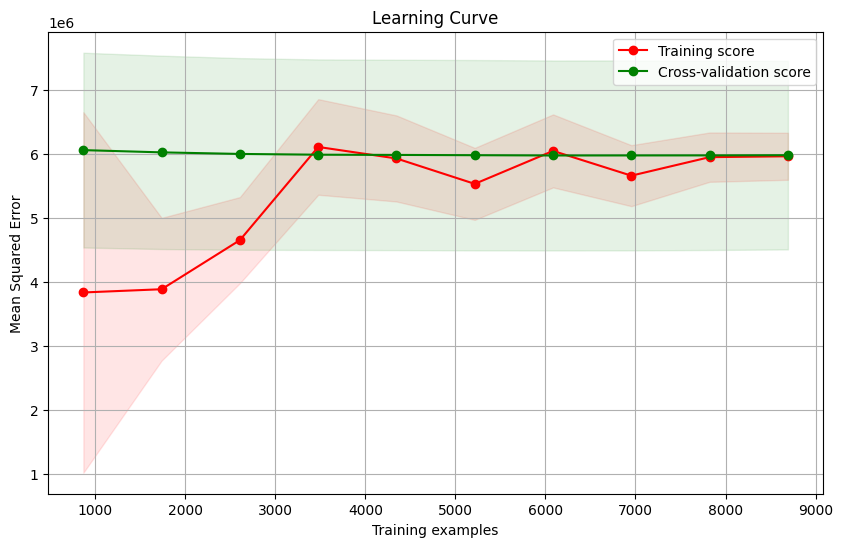

In [44]:
# Assuming X and y are your feature matrix and target variable
train_sizes, train_scores, test_scores = learning_curve(
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.0001,
                     max_depth = 6, alpha = 10, n_estimators = 100),
    X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation of training and test scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

In [46]:
# Make predictions
y_pred = xg_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")







Mean Squared Error: 5346692.0329178525
R-squared score: 0.0031209948883420546
